In [1]:
from tqst_class import *

In [2]:
tomo = tQST(2)
nq = tomo.get_num_of_qubits()
print(nq)
N=nq**2

diagonal = np.zeros(N)
diagonal[0]=1/2
diagonal[3]=1/2
# diagonal[12]=1/4
# diagonal[15]=1/4
print(diagonal)
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 2.
2
[0.5 0.  0.  0.5]
Diagonal counts are now set.
The threshold is now set to 0.16666666666666666.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+
nb of measurement necessary:  (2,)


1. dare i veri valori della diagonale

In [69]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename_diag='\Tomo_20Gen_Diag_Diego_TB'
fpath=DIR+folder+filename_diag


print("Loading... ", filename_diag)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)

binary_strings=data[:,0]
coinc=data[:,1]
diag_type_TB=data[:,6]
diag_type_FB=data[:,9]

## Order the binary data
indexed_binary_strings = enumerate(binary_strings)
sorted_with_indexes = sorted(indexed_binary_strings, key=lambda x: int(x[1], 2))

# Extract sorted strings and their original indexes
sorted_strings = [x[1] for x in sorted_with_indexes]
sorted_indexes = [x[0] for x in sorted_with_indexes]

diag_coinc=coinc[sorted_indexes]
diag_type_TB=diag_type_TB[sorted_indexes]
diag_type_FB=diag_type_FB[sorted_indexes]

print("Sorted Binary Strings:", sorted_strings)
print("Original Indexes:", sorted_indexes)
print("original coinc:", coinc)
print("diag_coinc, ordered:", diag_coinc)
print("Type time-bin, ordered:", diag_type_TB)
print("Type freq-bin, ordered:", diag_type_FB)

# Convert each string to a float
diag_coinc_arr = [float(x) for x in diag_coinc]
# tomo.set_diagonal_counts(diag_coinc_arr)

Loading...  \Tomo_20Gen_Diag_Diego_TB
Sorted Binary Strings: ['00', '01', '10', '11']
Original Indexes: [0, 1, 2, 3]
original coinc: [' 187.0' ' 0.0' ' 4.0' ' 169.0']
diag_coinc, ordered: [' 187.0' ' 0.0' ' 4.0' ' 169.0']
Type time-bin, ordered: [' 00' ' 01' ' 10' ' 11']
Type freq-bin, ordered: [' 00' ' 00' ' 00' ' 00']


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_30344\2670843033.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename_diag='\Tomo_20Gen_Diag_Diego_TB'


In [4]:
## if you want to calculate again the projector with the measured diagonal elements

gini = dmt.gini_index(diag_coinc_arr)
# threshold = tomo.set_threshold(gini)
threshold=0.1

offd_projs = tomo.get_projs_to_measure()

These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+


2. dare i counts misurati per ciascun proiettore (ancora ideali)

In [74]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename='\Tomo_20Gen_all_Diego_short_TB'
fpath=DIR+folder+filename

### Proj, Coinc, ph_s0, ph_i0, ph_s1, ph_i1, type_tb, ph_RF_s, ph_RF_i, type_fb
print("Loading... ", filename)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)
settings_TB=np.zeros([4,len(data)])
settings_FB=np.zeros([2,len(data)])

proj_name=data[:,0]
print(proj_name)
coinc=data[:,1]
settings_TB[0,:]=data[:,2]
settings_TB[1,]=data[:,3]
settings_TB[2,:]=data[:,4]
settings_TB[3,:]=data[:,5]
type_TB=data[:,6]
settings_FB[0,:]=data[:,7]
settings_FB[1,:]=data[:,8]
settings_FB=np.deg2rad(settings_FB)
type_FB=data[:,9]
# Convert each string to a float
coinc_arr = np.asarray([float(x) for x in coinc])
print(coinc_arr)

Loading...  \Tomo_20Gen_all_Diego_short_TB
['DD' 'DL']
[609. 300.]


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_30344\584687289.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename='\Tomo_20Gen_all_Diego_short_TB'


Diagonal counts are now set.
(6, 4)
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


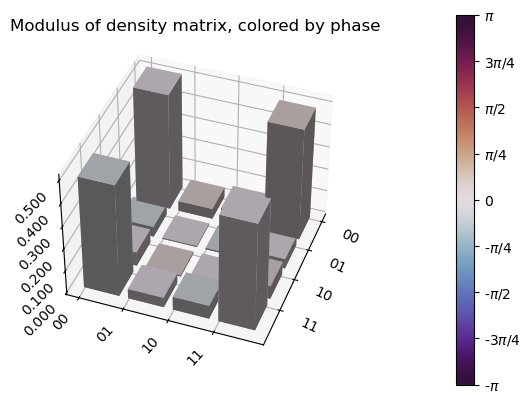

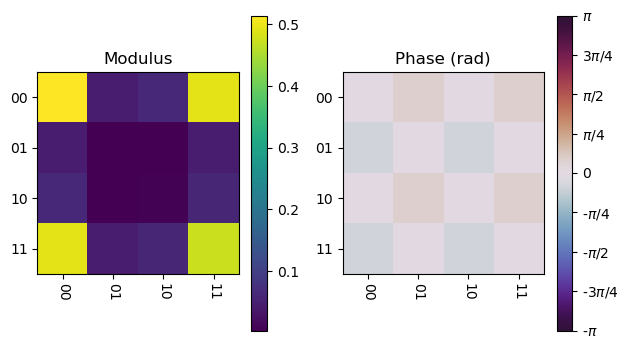

In [58]:
# coinc_arr.transpose()
# proj_name.transpose()
tomo.set_diagonal_counts(diag_coinc_arr/np.sum(diag_coinc_arr))
tomo.set_projs_and_counts(proj_name, coinc_arr/np.sum(coinc_arr))
projs, counts = tomo.get_projs_and_counts()
print(np.shape(projs))
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)
dmt.plot_density_matrix_2D(rho_rec)

In [31]:
np.sum(coinc_arr)

1526.0

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


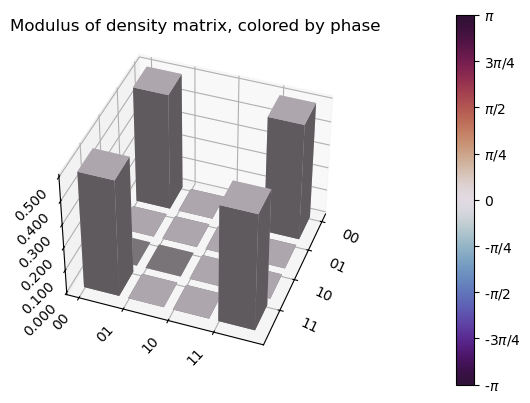

0.8409841294717715
0.594152504285332


In [8]:
## Ideal density matrix

psi_true=np.zeros(N)
psi_true[0]=1/np.sqrt(2)
psi_true[3]=1/np.sqrt(2)
# psi_true[12]=1/2
# psi_true[15]=1/2
rho_true=np.outer(psi_true,psi_true)

dmt.plot_density_matrix_3D(rho_true)

f=dmt.fidelity(rho_rec,rho_true)
print(f)
pur=dmt.purity(rho_rec)
print(pur)

3. Now let's set our real projectors...

TO be considered:
- losses (to implement)
- post selection factors


In [59]:
def W_tb_si_func(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l):
    W=np.zeros([4,4], dtype=np.complex128)
    W[0,0]=Css*np.exp((phs_s+phi_s)*1.0j)
    W[1,0]=Csl*np.exp((phs_s+phi_l)*1.0j)
    W[2,0]=Cls*np.exp((phs_l+phi_s)*1.0j)
    W[3,0]=Cll*np.exp((phs_l+phi_l)*1.0j)
    W[1,1]= W[0,0]
    W[2,2]= W[0,0]
    W[3,3]= W[0,0]
    W[3,1]= W[2,0]
    W[3,2]= W[1,0]
    
    return W

def W_fb_func(J_1, J0, J1, theta):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0] = J0
    W[1,1] = W[0,0]
    W[0,1] = J1*np.exp(theta*1.0j)
    W[1,0] = -J_1*np.exp(-theta*1.0j)

    return W

def W_fb_si_func(J_1_s, J0_s, J1_s, ph_s, J_1_i, J0_i, J1_i, ph_i):
    W_s=W_fb_func(J_1_s, J0_s, J1_s, ph_s)
    W_i=W_fb_func(J_1_i, J0_i, J1_i, ph_i)
    W=np.kron(W_s,W_i) 

    return W

In [22]:
## try if the matrixes work

# W_tb_si(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l)
W_tb_si=W_tb_si_func(1.4, 1.2, 1.1, 1.0, 0, 0, 0.0, np.pi/2)
print(W_tb_si.conj().T)

# W_fb_si(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
W_fb_si=W_fb_si_func(1,1,1,0,1,1,1,0)
print(W_fb_si)

Wexp=np.kron(W_tb_si,W_fb_si)
print(Wexp)

[[1.40000000e+00-0.j  7.34788079e-17-1.2j 1.10000000e+00-0.j
  6.12323400e-17-1.j ]
 [0.00000000e+00-0.j  1.40000000e+00-0.j  0.00000000e+00-0.j
  1.10000000e+00-0.j ]
 [0.00000000e+00-0.j  0.00000000e+00-0.j  1.40000000e+00-0.j
  7.34788079e-17-1.2j]
 [0.00000000e+00-0.j  0.00000000e+00-0.j  0.00000000e+00-0.j
  1.40000000e+00-0.j ]]
[[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]]
[[1.40000000e+00+0.j  1.40000000e+00+0.j  1.40000000e+00+0.j
  1.40000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j ]
 [1.40000000e+00+0.j  1.40000000e+00+0.j  1.40000000e+00+0.j
  1.40000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.000

Ideal proj diag:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.98616807+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
Ideal proj diag:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.        +0.j 0.98616807+0.j 0.        +0.j 0.        +0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
Exp proj daig:  [0.        +0.j 0.        +0.j 0.98616807+0.j 0.        +0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Exp proj daig:  [0.        +0.j 0.        +0.j 0.        +0.j 0.98616807+0.j]
Coinc diag:  [187.   0.   4. 169.   0.   0.]
Base:  VV
Proj:  DD
Ideal proj:  [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
Exp proj:  [1.        +0.j 0.98337835+0.j 1.16967169+0.j 0.98616807+0.j]
Base:  VV
Proj:  DL
Ideal proj:  [0.5+0.j  0. -0.5j 0.5+0.j  0. -0.5j]
Exp proj:  [-3.67320510e-06+1.j          9.83378345e-01+0.j
 -4.29644403e-06+1.16967169j  9.86168074e-01+0.j        ]
(6, 4)


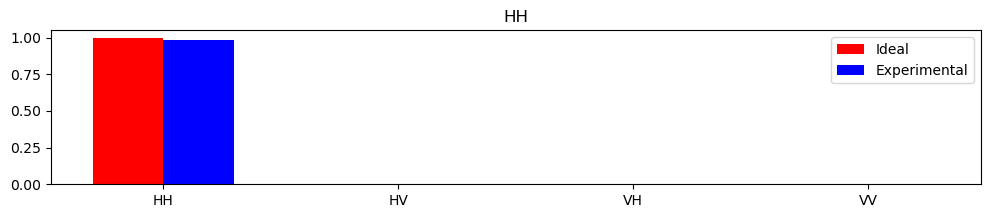

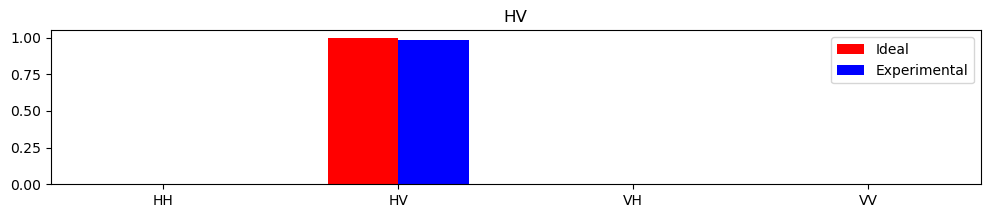

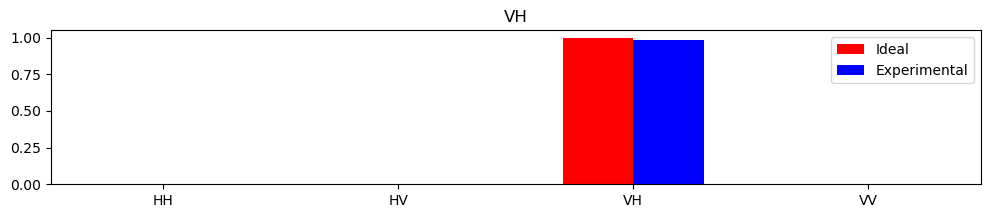

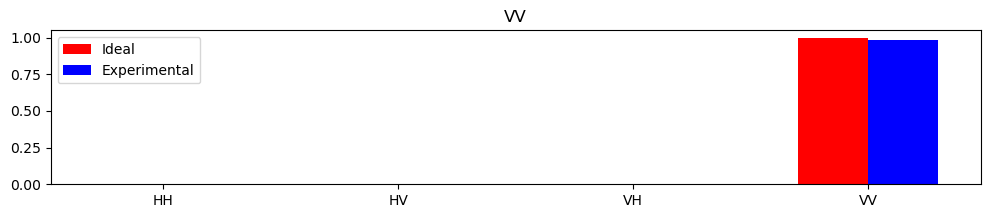

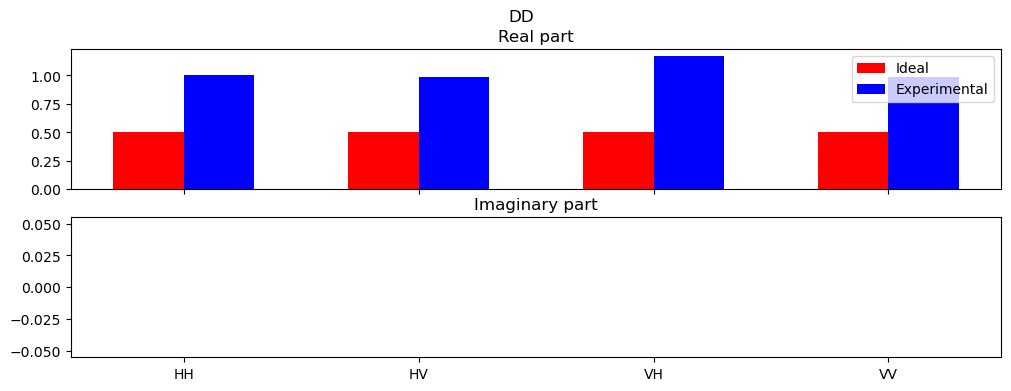

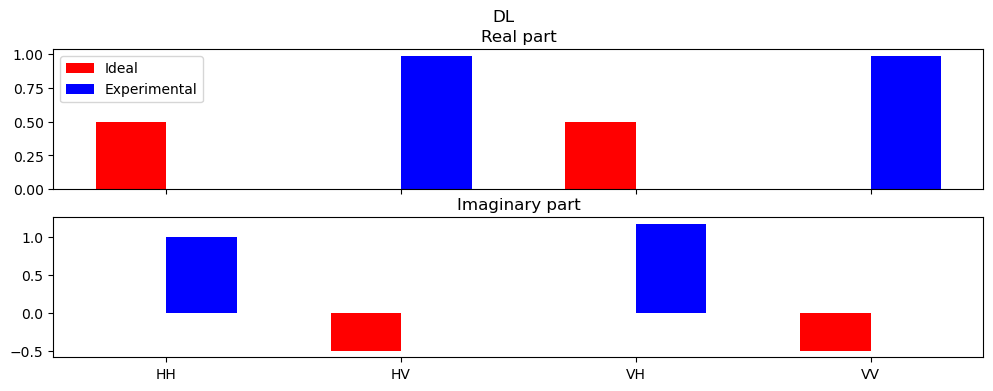

In [75]:
# 1.42732558 1.20348837 1.2005814  1.         file: 6Dic /Pin-3dBm_Phase0.0_300s_F2_1pLong


#Proj_dict[offd_projs[0]]['vect']
diag_name=np.array(['HH','HV','VH','VV'])
all_proj_name=np.append(diag_name,proj_name)
NbProj=len(all_proj_name)
base = np.zeros([NbProj,N], dtype=np.complex128)
Proj = np.zeros([NbProj,N], dtype=np.complex128)
Proj_exp = np.zeros([NbProj,N], dtype=np.complex128)
Coinc_exp = np.zeros([NbProj])

## from calibration
# C_arr = Css, Csl, Cls, Cll
C_arr=np.sqrt(np.array([0.97252747, 1.36813187, 0.96703297, 1.        ]))
# C_arr=np.sqrt(np.array([1, 1, 1,  1]))
Loss_s = np.sqrt(10**(-9/10)) #from Franson (after) to detectors
Loss_i = np.sqrt(10**(-9/10)) #from Franson (after) to detectors
# J_arr = J-1 s, J0 s, J+1 s, J-1 i, J0 i, J+1 i
J_arr_s=np.sqrt( np.array([0.33,0.33,0.33]) ) * Loss_s
J_arr_i=np.sqrt( np.array([0.33,0.33,0.33]) ) * Loss_i

for i in range(N):
    ## DIAG, is measured with thelong arm of the MZI close, 
    # so no norm is needed. The phi-mod are also off (@output)

    Coinc_exp[i]=diag_coinc_arr[i] #/np.sum(diag_coinc_arr)
    base[i,:]=prj.extended_projector_from_string(diag_name[i])
    Proj[i,:]=prj.extended_projector_from_string(diag_name[i])
    # print(diag_name[i])

    ## FB, for the diagonal, the modulator @ output are OFF, both idler and signal
    J0=1.0
    J1=0.0
    J_1=0.0

    ## TB for the daigonal, the long-arm of the franson is blocked! ONLY SHORT
    Css=C_arr[0]
    Csl=0
    Cls=0
    Cll=0

    ## for each projector, define the matrix Wexp with the correct parameters
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,0,0)
    # print(W_tb_si)
    W_fb_si=W_fb_si_func(J_1,J0*Loss_s,J1,0.0, J_1,J0*Loss_i,J1,0.0)
    # print(W_fb_si)
    # Wexp=np.kron(W_tb_si,W_fb_si)
    Wexp=W_tb_si
    # proj_2=np.outer(Proj[i,:],Proj[i,:])
    # W=np.matmul(Wexp.conj().T,proj_2)
    Wexp_2=Wexp.conj().T
    Proj_exp[i,:]=np.matmul(Wexp_2,base[i,:])
    print('Ideal proj diag: ', Proj[i,:])
    print('Exp proj daig: ', Proj_exp[i,:])

    ## plot projector (diag)
    fig, ax= plt.subplots(figsize=(12, 2), ncols=1, nrows=1)
    X=np.linspace(1,N,N)
    width=0.3
    ax.set_title(diag_name[i])
    ax.bar(X-width/2,np.real(Proj[i,:]), label='Ideal', color='red', width=width)
    ax.bar(X+width/2,np.real(Proj_exp[i,:]), label='Experimental', color='blue', width=width)
    ax.set_xticks(X,diag_name)
    ax.legend()
   
print('Coinc diag: ', Coinc_exp)

for p in range(len(proj_name)):
    Css=C_arr[0]
    Csl=C_arr[1]
    Cls=C_arr[2]
    Cll=C_arr[3]

    if type_TB[p]==' ss':
        string_TB='HH'
    if type_TB[p]==' sl':
        string_TB='HV'
    if type_TB[p]==' ls':
        string_TB='VH'
    if type_TB[p]==' ll':
        string_TB='VV'

    # if type_FB[p]==' 00':
    #     string_FB='HH'
    # if type_FB[p]=='01':
    #     string_FB='HV'
    # if type_FB[p]==' 10':
    #     string_FB='VS'
    # if type_FB[p]==' 11':
    #     string_FB='VV'
    
    # if proj_name[p][2:4]=='DD' or proj_name[p][2:4]=='DR' or proj_name[p][2:4]=='RD' or proj_name[p][2:4]=='RR' or proj_name[p][2:4]=='LD' or proj_name[p][2:4]=='DL':
    #     # print('superposition :', proj_name[p][2:4])
    #     W_fb_si=W_fb_si_func(J_arr_s[0],J_arr_s[1],J_arr_s[2],settings_FB[0,p],J_arr_i[0],J_arr_i[1],J_arr_i[2],settings_FB[1,p])
    #     # print(J_arr[0],J_arr[1],J_arr[2],settings_FB[0,p],J_arr[3],J_arr[4],J_arr[5],settings_FB[1,p])
    #     # print(W_fb_si)
    #     string_FB='HH'
    # else:
    #     # print('not superposition :', proj_name[p][2:4])
    #     J0=1.0
    #     J1=0.0
    #     J_1=0.0
    #     W_fb_si=W_fb_si_func(J_1,J0*Loss_s,J1,settings_FB[0,p],J_1,J0*Loss_i,J1,settings_FB[1,p])

    
    if type_TB[p]==' 2l2l':
        print('2l2l case')
        string_TB='VV' 
        Css=C_arr[3]
        Csl=0
        Cls=0
        Cll=0 
        ## misuro i timestamp nello slot temporale '2l2l'
        ## i due fotoni hanno effettivamente fatto il long, ma è solo per comodità sperimentale
        ## 2 fotoni late fanno il long é equivalente a 2 fotoni late che arrivano nel time slot ll quando il braccio long é bloccato!
        ## la possibilità 2l2l non é presa in considerazione dalla matrice 4x4, ci vorrebbe la 6x6
        ## quindi
        # MISURA : 2 fotoni late che passano dal long
        # ANALISI : 2 fotoni late ('VV') passano dallo short col long bloccato, ma ci vogliono le perdite reali!

    string_FB=''
    pr=p+N
    base[pr,:]=prj.extended_projector_from_string(string_TB+string_FB)
    print('Base: ', string_TB+string_FB)
    # print(base[pr,:])
    ## for each projector, define the matrix Wexp with the correct parameters
    print('Proj: ', proj_name[p])

    # if settings_TB[3,p]==-1.0:
    #     settings_TB[3,p]=0.0

    
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0.0,0.0,settings_TB[2,p],settings_TB[3,p])
    # print((Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p]))
    # print(W_tb_si)
    
    # Wexp=np.kron(W_tb_si,W_fb_si)
    Wexp=W_tb_si
    # print(Wexp)
    ######

    Proj[pr,:]=prj.extended_projector_from_string(proj_name[p])
    Wexp_2=Wexp.conj().T

    print('Ideal proj: ', Proj[pr,:])
    Coinc_exp[pr]=coinc_arr[p] #/np.sum(coinc_arr)
    Proj_exp[pr,:]=np.dot(Wexp_2,base[pr,:])
    print('Exp proj: ', Proj_exp[pr,:])

    ##plot projectors
    fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)

    X=np.linspace(1,N,N)
    width=0.3
    axr.bar(X-width/2,np.real(Proj[pr,:]), label='Ideal', color='red', width=width)
    axr.bar(X+width/2,np.real(Proj_exp[pr,:]), label='Experimental', color='blue', width=width)
    axr.set_title('Real part')
    axi.bar(X-width/2,np.imag(Proj[pr,:]), label='Ideal', color='red', width=width)
    axi.bar(X+width/2,np.imag(Proj_exp[pr,:]), label='Experimental', color='blue', width=width)
    axi.set_title('Imaginary part')
    fig.suptitle(proj_name[p])
    axi.set_xticks(X,diag_name)
    axr.legend()

# print(proj_name)
# print(Proj_exp)
print(Proj_exp.shape)

In [20]:
vec=prj.extended_projector_from_string('DR')
print(vec)

vec=Proj_exp[-1]
info=np.matmul(rho_true,vec)
info=np.matmul(vec.conj().T,rho_true)
print(info)

[0.5+0.j  0. +0.5j 0.5+0.j  0. +0.5j]
[0.49999816+0.5j 0.        +0.j  0.        +0.j  0.49999816+0.5j]


The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


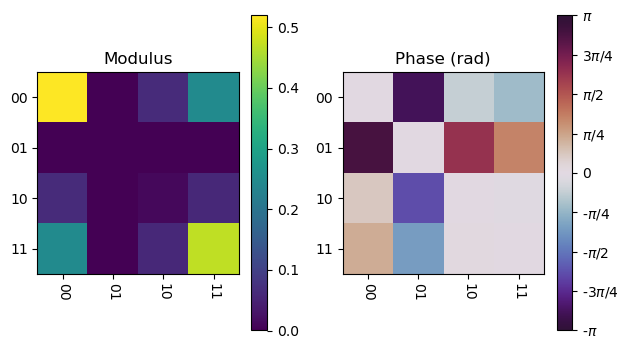

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


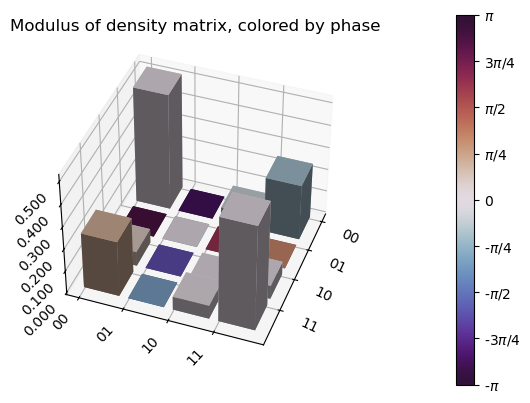

Fidelity:  0.8286447330889608
Purity:  0.628941009299643


In [76]:
tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp)
# rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp/np.sum(diag_coinc_arr))

dmt.plot_density_matrix_2D(rho_rec)
dmt.plot_density_matrix_3D(rho_rec)




f=dmt.fidelity(rho_rec,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec)
print('Purity: ', pur)

In [78]:
Proj_exp

array([[ 9.86168074e-01+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  9.86168074e-01+0.j        ,
         0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         9.86168074e-01+0.j        ,  0.00000000e+00+0.j        ],
       [ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
         0.00000000e+00+0.j        ,  9.86168074e-01+0.j        ],
       [ 1.00000000e+00+0.j        ,  9.83378345e-01+0.j        ,
         1.16967169e+00+0.j        ,  9.86168074e-01+0.j        ],
       [-3.67320510e-06+1.j        ,  9.83378345e-01+0.j        ,
        -4.29644403e-06+1.16967169j,  9.86168074e-01+0.j        ]])

(6,)


C:\Users\sc266065\AppData\Local\Temp\ipykernel_30344\1561230686.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts_rec[d]=np.dot(a.conj().T,counts_rec1)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


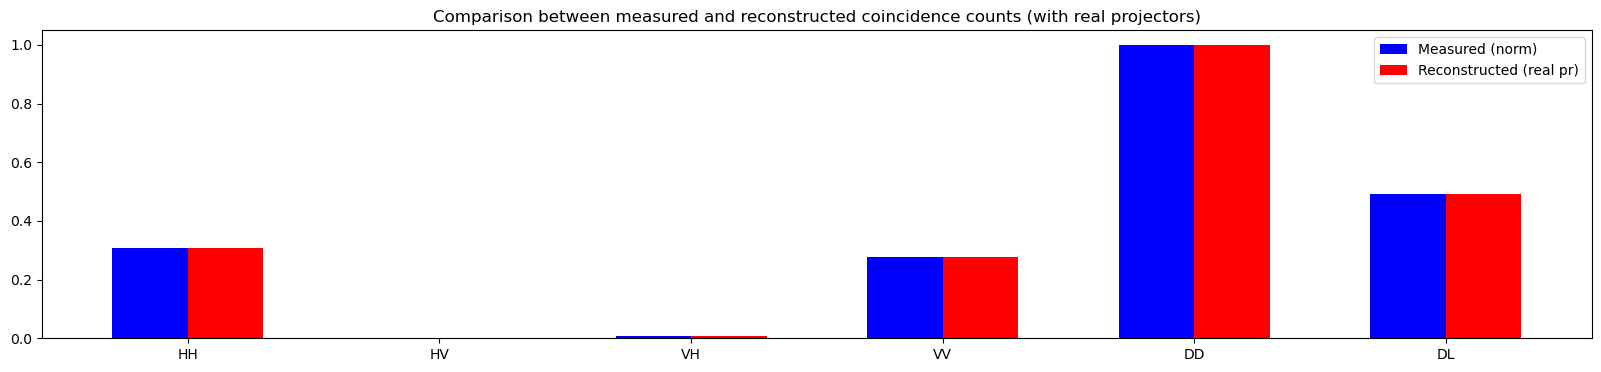

In [80]:
counts_rec=np.zeros(N+len(proj_name), dtype=complex)
print(np.shape(counts_rec))

## Proj_exp, Coinc_exp

fig, ax= plt.subplots(figsize=(20, 4), ncols=1, nrows=1)
for d in range(len(Proj_exp)):
    # print(diag_name[d])
    a=Proj_exp[d].reshape(N,1)
    # print(np.shape(a))

    counts_rec1=np.dot(rho_rec,a)
    # print(counts_ideal1)
    counts_rec[d]=np.dot(a.conj().T,counts_rec1)
    # print(counts_rec[d], Coinc_exp[d])

X=np.linspace(1,NbProj,NbProj)
width=0.3
ax.bar(X-width/2,Coinc_exp/np.max(Coinc_exp), label='Measured (norm)', color='blue', width=width)
ax.bar(X+width/2,counts_rec/np.max(counts_rec), label='Reconstructed (real pr)', color='red', width=width)
ax.set_xticks(X,np.append(diag_name,proj_name))
ax.set_title("Comparison between measured and reconstructed coincidence counts (with real projectors)")
ax.legend(loc='best')

# ax[1].bar(proj_name,coinc_arr/np.sum(coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
# ax[1].bar(proj_name,counts_ideal[N:], label='Reconstructed (ideal pr)', color='red', alpha=0.5)
# ax[1].set_title("Projectors' counts")
# ax[1].legend()

    

(6,)


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


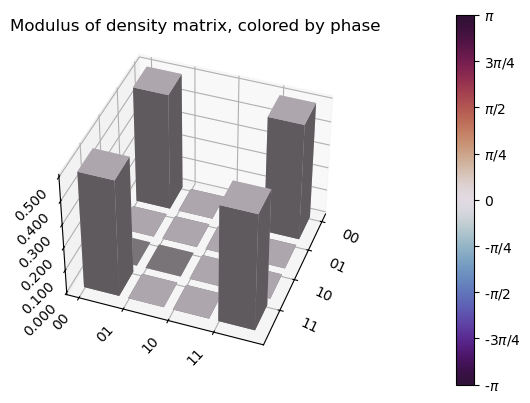

c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


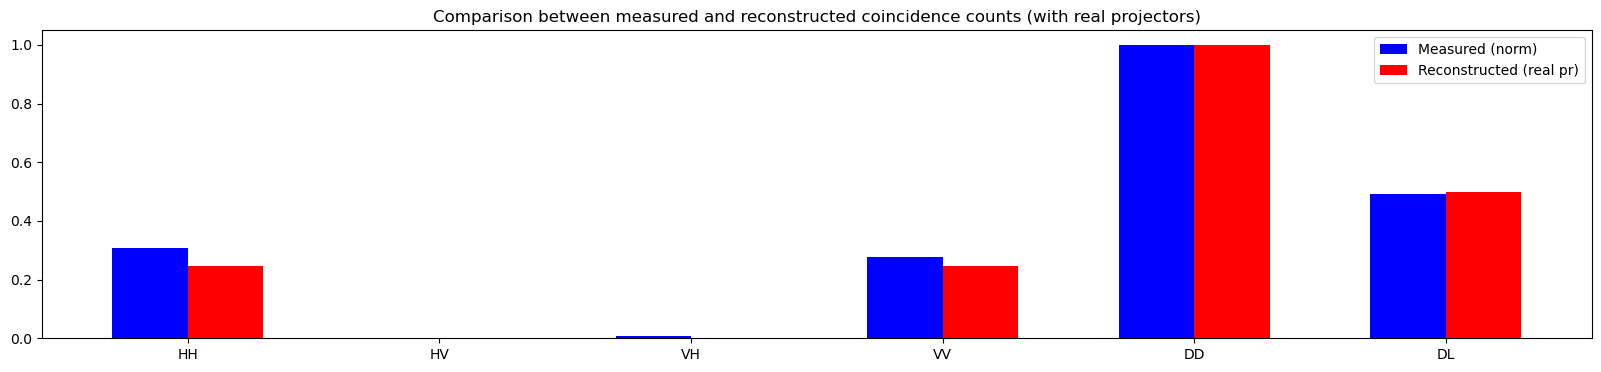

In [84]:
counts_rec=np.zeros(N+len(proj_name), dtype=complex)
counts_rec1=np.zeros([1,N+len(proj_name)], dtype=complex)
a=np.zeros([1,N], dtype=complex)
print(np.shape(counts_rec))

## Proj_exp, Coinc_exp

dmt.plot_density_matrix_3D(rho_true)
fig, ax= plt.subplots(figsize=(20, 4), ncols=1, nrows=1)
for d in range(len(Proj_exp)):
    # print(diag_name[d])
    a=Proj_exp[d].reshape(N,1)
    # print(np.shape(a))

    counts_rec1=np.dot(rho_true,a)
    # print(counts_ideal1)
    counts_rec[d]=np.dot(a.conj().T[0,:],counts_rec1[:,0])
    # print(counts_rec[d], Coinc_exp[d])

X=np.linspace(1,NbProj,NbProj)
width=0.3
ax.bar(X-width/2,Coinc_exp/np.max(Coinc_exp), label='Measured (norm)', color='blue', width=width)
ax.bar(X+width/2,counts_rec/np.max(counts_rec), label='Reconstructed (real pr)', color='red', width=width)
ax.set_xticks(X,np.append(diag_name,proj_name))
ax.set_title("Comparison between measured and reconstructed coincidence counts (with real projectors)")
ax.legend(loc='best')

    

In [83]:
len(Proj_exp)

6

In [14]:
Proj_exp

array([[ 1.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
         0.0000000e+00+0.j],
       [ 0.0000000e+00+0.j,  1.0000000e+00+0.j,  0.0000000e+00+0.j,
         0.0000000e+00+0.j],
       [ 0.0000000e+00+0.j,  0.0000000e+00+0.j,  1.0000000e+00+0.j,
         0.0000000e+00+0.j],
       [ 0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
         1.0000000e+00+0.j],
       [ 1.0000000e+00+0.j,  1.0000000e+00+0.j,  1.0000000e+00+0.j,
         1.0000000e+00+0.j],
       [-3.6732051e-06+1.j,  1.0000000e+00+0.j, -3.6732051e-06+1.j,
         1.0000000e+00+0.j],
       [-3.6732051e-06-1.j,  1.0000000e+00+0.j, -3.6732051e-06-1.j,
         1.0000000e+00+0.j]])

In [15]:
Coinc_exp

array([319.,   2.,   4., 294., 609., 386., 455.])